# Lab | Customer Analysis Final Round 

## 01 - Problem (case study)

    Data Description.
    Goal.



In [1]:
#import necessary librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew, kurtosis
from statsmodels.graphics.gofplots import qqplot



## 02 - Getting Data

    Read the .csv file.



In [2]:
#reading csv file
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 03 - Cleaning/Wrangling/EDA

In [3]:
col=list(data.columns)
col

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

#### Change headers names.


In [4]:
data.columns = data.columns.str.lower()

In [5]:
data= data.rename(columns={'employmentstatus':'employment status'})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employment status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

#### Check and deal with NaN values.

In [7]:
round(data.isna().sum()/len(data),4)*100

customer                         0.0
state                            0.0
customer lifetime value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective to date                0.0
employment status                0.0
gender                           0.0
income                           0.0
location code                    0.0
marital status                   0.0
monthly premium auto             0.0
months since last claim          0.0
months since policy inception    0.0
number of open complaints        0.0
number of policies               0.0
policy type                      0.0
policy                           0.0
renew offer type                 0.0
sales channel                    0.0
total claim amount               0.0
vehicle class                    0.0
vehicle size                     0.0
dtype: float64

####     Numerical Features.


In [8]:
numerics = ['int64','float64']

data_num=data.select_dtypes(include=numerics)
data_num

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [9]:
data_cat=data.select_dtypes('object')
data_cat


,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [10]:
#dropping unnesessary columns
data_cat = data_cat.drop(["customer", "effective to date"], axis = 1)

#### Exploration

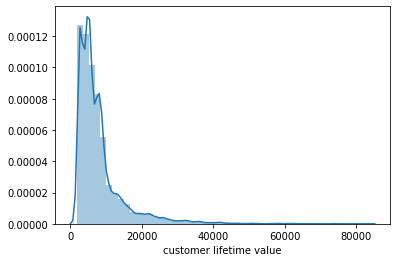

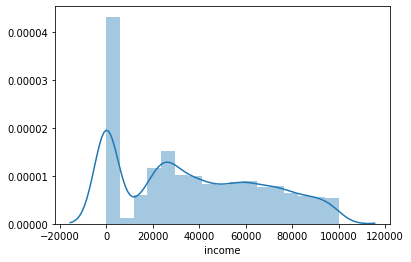

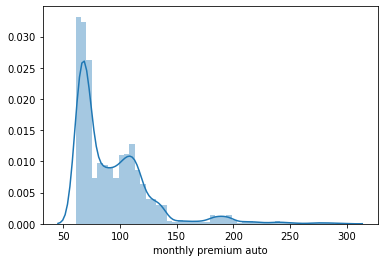

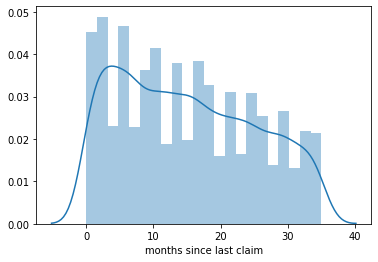

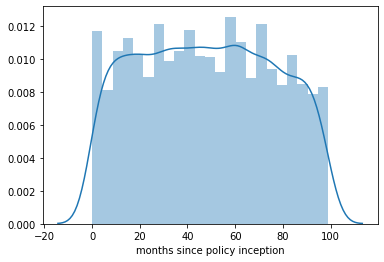

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

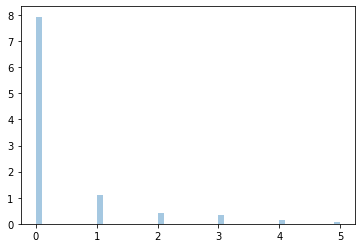

In [11]:
# Exploration - Numerical
col_num=list(data_num.columns)
for cols in col_num:
    sns.distplot(data_num[cols].astype(float))
    plt.show()
    


In [12]:
for cols in col_num:
    x=data_num[cols].unique()
    x
    

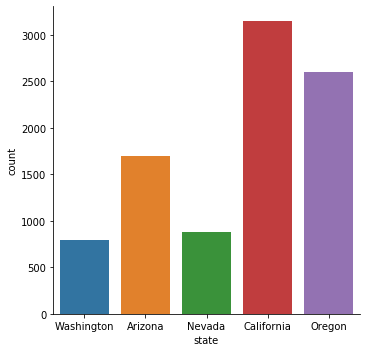

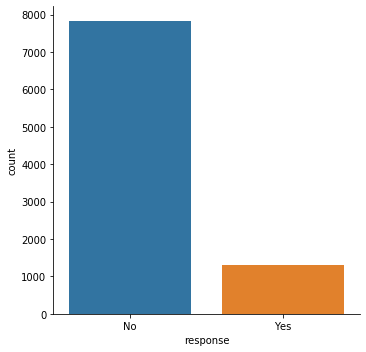

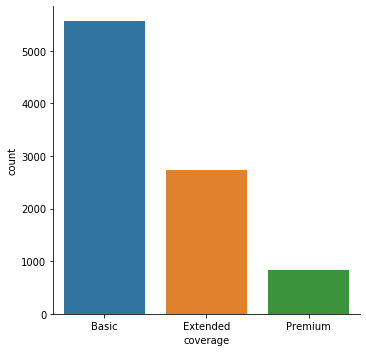

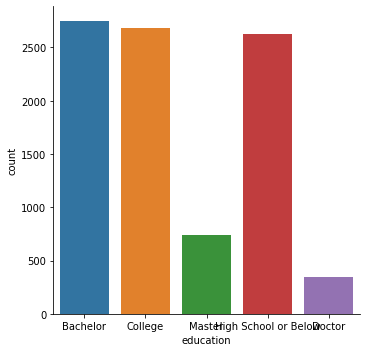

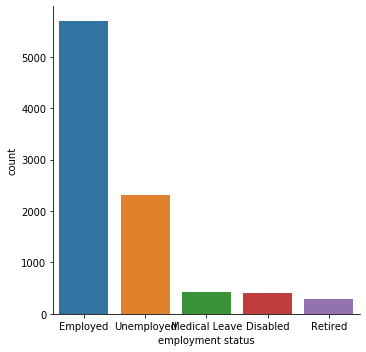

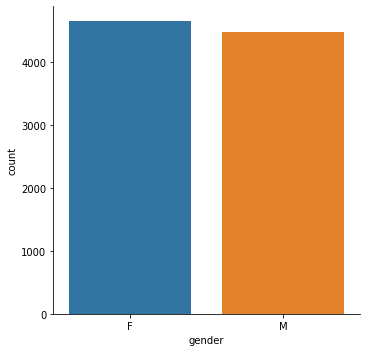

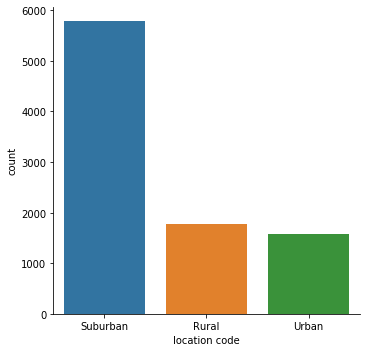

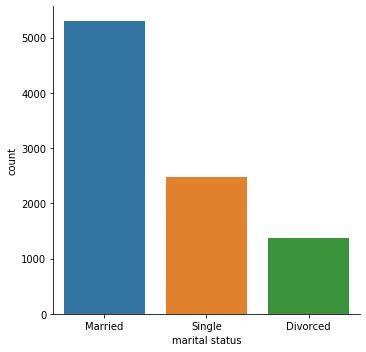

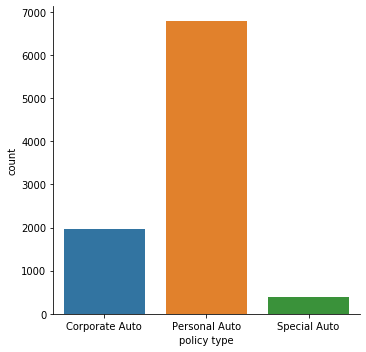

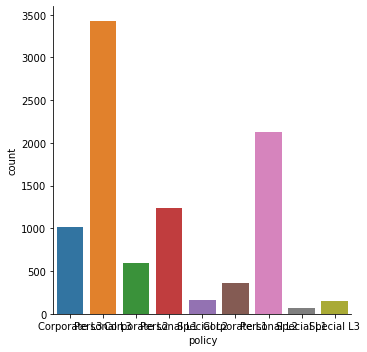

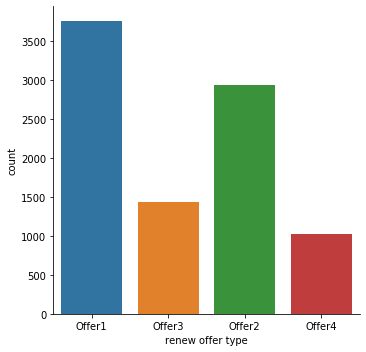

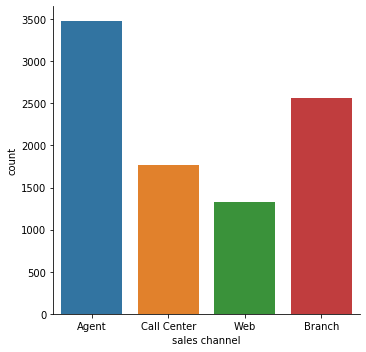

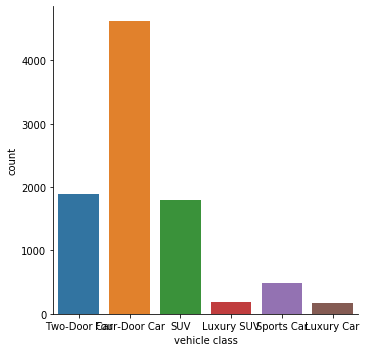

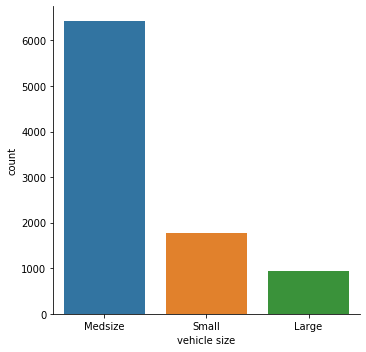

In [13]:
# Exploration - Categorical
col_cat=list(data_cat.columns)

for cos in data_cat.columns:
    sns.catplot(x = cos, kind = "count", data = data_cat)
    plt.show()

#### checking correlation 

In [14]:
Pearson =data_num.corr()

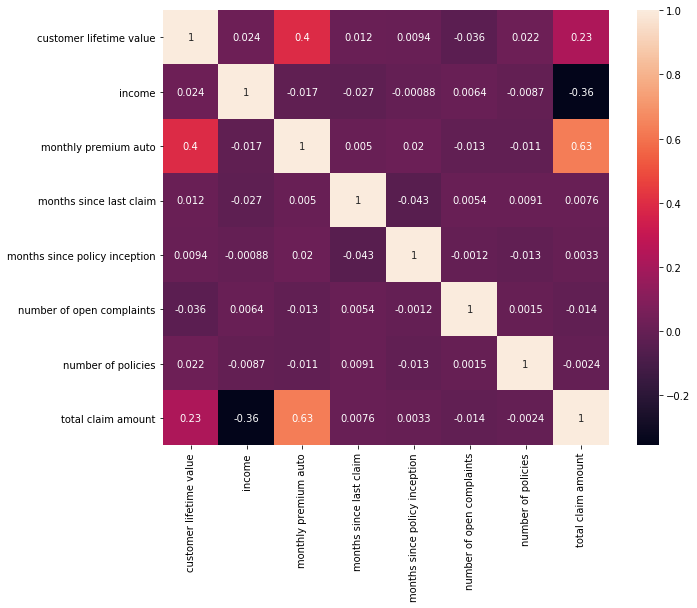

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(Pearson, annot=True)
plt.show()

## 04 - Processing Data


### Dealing with outliers.


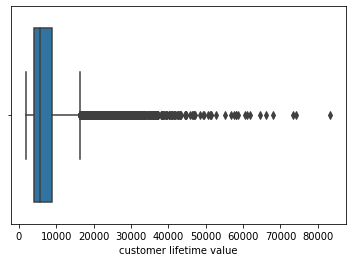

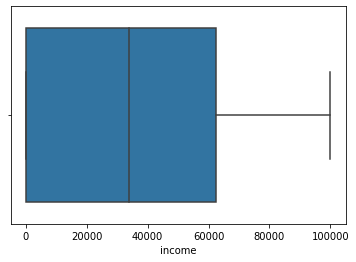

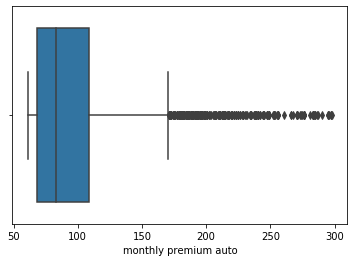

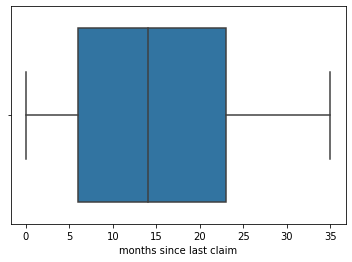

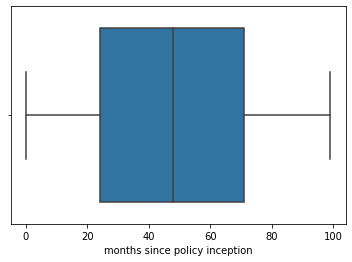

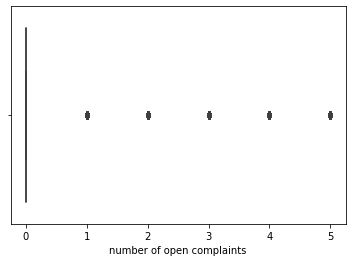

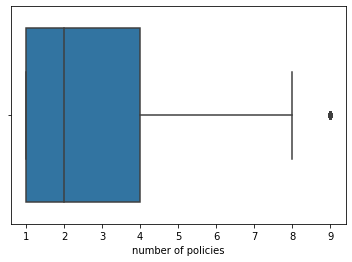

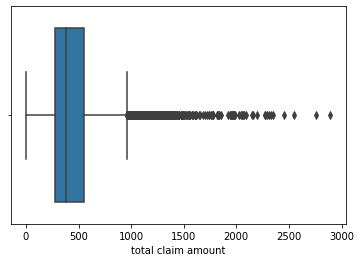

In [16]:
#box-plt - numerical data 

for cols in col_num:
    ax = sns.boxplot(x=data_num[cols])
    plt.show()

In [17]:
for cols in col_num:
        Q1 = np.quantile(data_num[cols],0.25)
        Q3 = np.quantile(data_num[cols],0.75)
        out_high = Q3+1.5*(Q3-Q1)
        out_low = Q1-1.5*(Q3-Q1)
        
        out_l = data[(data_num[cols] < out_low) | (data_num[cols] > out_high)].index
        
        print("Number of outliers of ", cols,':', len(out_l))

Number of outliers of  customer lifetime value : 817
Number of outliers of  income : 0
Number of outliers of  monthly premium auto : 430
Number of outliers of  months since last claim : 0
Number of outliers of  months since policy inception : 0
Number of outliers of  number of open complaints : 1882
Number of outliers of  number of policies : 416
Number of outliers of  total claim amount : 453


### X-Y split

In [18]:
y = data['total claim amount']

x = data.drop('total claim amount',axis=1)
xn=x.select_dtypes(include = 'number')

column : customer lifetime value
skew : 3.0317822713278852
kurtosis : 13.815310695287444


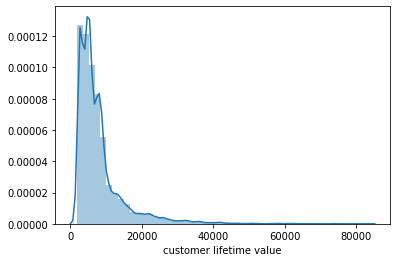

column : income
skew : 0.28684016057807576
kurtosis : -1.094383828097193


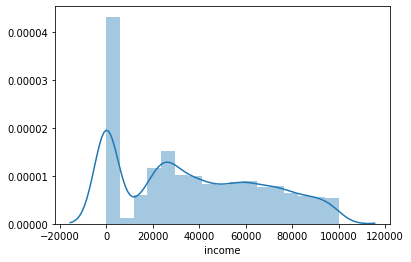

column : monthly premium auto
skew : 2.123197701864424
kurtosis : 6.189558258832852


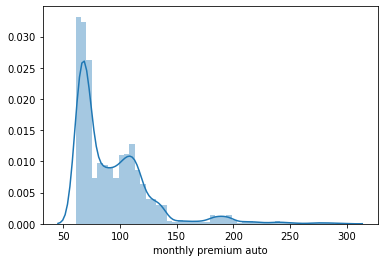

column : months since last claim
skew : 0.2785405598366762
kurtosis : -1.0737368448075961


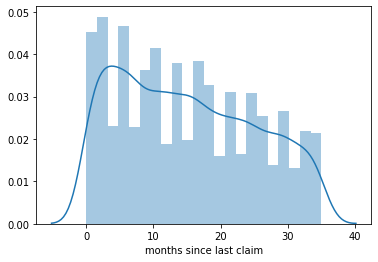

column : months since policy inception
skew : 0.040158365343045704
kurtosis : -1.1330825805856537


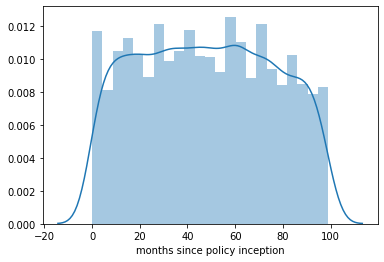

column : number of open complaints
skew : 2.7828059596647505
kurtosis : 7.744410297233042


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

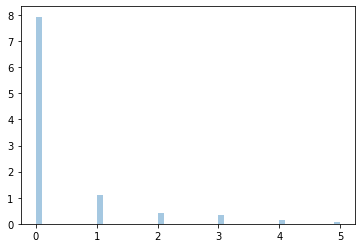

In [19]:
#check for normality
colx=list(xn.columns)

for i in colx:
    print('column :', i)
    print('skew : {}'.format(skew(xn[i])))
    print('kurtosis : {}'.format(kurtosis(xn[i])))
    sns.distplot(xn[i])
    plt.show()

### Normalization

In [23]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(xn)
x_norm = transformer.transform(xn)

In [24]:
x_norm = pd.DataFrame(x_norm)
x_norm.head()

,0,1,2,3,4,5,6
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023


In [25]:
x_norm.rename(columns = {0:'customer lifetime value',1:'income',2:'monthly premium auto',
       3:'number of open complaints', 4:'number of policies'}, inplace=True)
x_norm.head()

,customer lifetime value,income,monthly premium auto,number of open complaints,number of policies,5,6
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023


column : customer lifetime value
skew : 0.7923734641974239
kurtosis : -1.1314661162405049


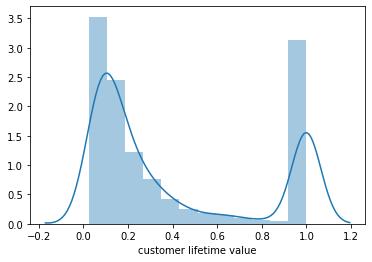

column : income
skew : -1.0743609632968034
kurtosis : -0.7913935376735952


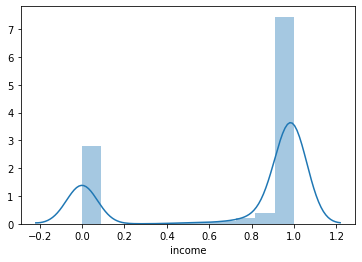

column : monthly premium auto
skew : 1.9454228848937334
kurtosis : 2.7315706887351814


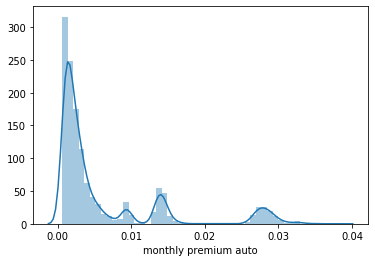

column : number of open complaints
skew : 3.5174967173941805
kurtosis : 14.460821523239215


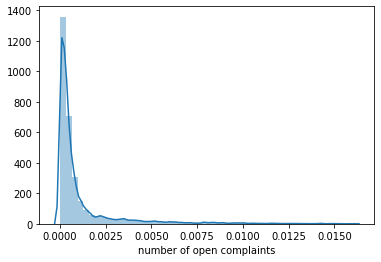

column : number of policies
skew : 3.313042118062441
kurtosis : 12.63476354039528


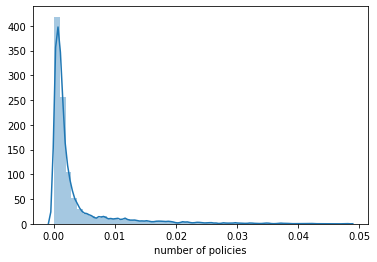

column : 5
skew : 8.575823119254277
kurtosis : 91.88458789622786


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

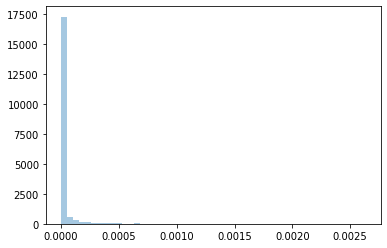

In [26]:
#check for normality
colx=list(x_norm.columns)

for i in colx:
    print('column :', i)
    print('skew : {}'.format(skew(x_norm[i])))
    print('kurtosis : {}'.format(kurtosis(x_norm[i])))
    sns.distplot(x_norm[i])
    plt.show()

### Encoding Categorical Data.


In [27]:
x_cat = x.select_dtypes(include = "object")
x_cat.head()


,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [28]:
#Encoding Categorical data
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(x_cat)
xcat_he = pd.DataFrame(encoder.transform(x_cat).toarray())

xcat_he.head()

,0,1,2,3,4,5,6,7,8,9,...,9224,9225,9226,9227,9228,9229,9230,9231,9232,9233
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
# concatinating numerical and categorical into one

x = pd.concat([x_norm,x_cat], axis = 1)
x.head()

,customer lifetime value,income,monthly premium auto,number of open complaints,number of policies,5,6,customer,state,response,...,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018,BU79786,Washington,No,...,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146,QZ44356,Arizona,No,...,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040,AI49188,Nevada,No,...,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915,WW63253,California,No,...,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023,HB64268,Washington,No,...,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [31]:
# cat to num
x= pd.get_dummies(x, drop_first = True)
x.head()


,customer lifetime value,income,monthly premium auto,number of open complaints,number of policies,5,6,customer_AA11235,customer_AA16582,customer_AA30683,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 05 - Modeling





#### Splitting into train set and test set.


In [35]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
    
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2, random_state = 700)
model = LinearRegression()
    
lm = model.fit(X_train, Y_train)

predictions = lm.predict(X_test)
    
residuals = predictions - Y_test
    

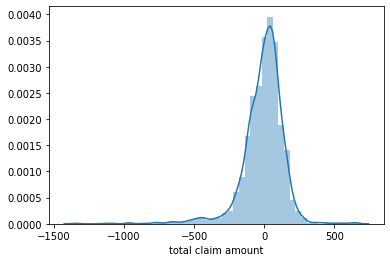

In [33]:

sns.distplot(residuals)

## 06 - Model Validation

    R2.
    MSE.
    RMSE.
    MAE.



In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

mae = mean_absolute_error(Y_test,predictions)
mse = mean_squared_error(Y_test,predictions)
rmse = (mean_squared_error(Y_test,predictions))**0.5
print("MAE =  " + str(mae))
print("MSE =  " + str(mse))
print("RMAE = " + str(rmse))
print("r2 =  " + str(r2_score(Y_test, predictions)))

MAE =  101.74757807426752
MSE =  23506.026176074807
RMAE = 153.31675112679244
r2 =  0.7547499805619551


## 07 - Reporting



### Try to improve the linear regression model.
##### income = 0 and income > 0 